<h2>En este notebook se retoman los resultados obtenidos tras haber aplicado una librería de análisis de sentimiento específica para el lenguaje español</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

ruta = 'Tweetsentpol.csv'

df = pd.read_csv(ruta, header=0)
#df.shape
df.head()

,Fecha,User_location,Polarity
0,2020-02-28,NaN,-0.527532
1,2020-02-28,NaN,-0.519151
2,2020-02-28,NaN,0.311465
3,2020-02-28,NaN,-0.984464
4,2020-02-28,NaN,-0.998233


<h3>De los datos disponibles, se toma solamente la fecha y la polaridad calculada, después se obtiene el promedio diario del puntaje de sentimiento</h3>

In [2]:
df2 = df[['Fecha', 'Polarity']]
df2["Fecha"] = df2["Fecha"].astype("datetime64")
df3 = df2.groupby(['Fecha']).mean()
df3.head()

<ipython-input-2-7e343c64ef6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Fecha"] = df2["Fecha"].astype("datetime64")


,Polarity
Fecha,
2020-02-28,-0.361114
2020-02-29,-0.204301
2020-03-01,-0.200173
2020-03-02,-0.179771
2020-03-03,-0.153471


<h3>Se imprime la gráfica para toda la serie de tiempo disponible</h3>

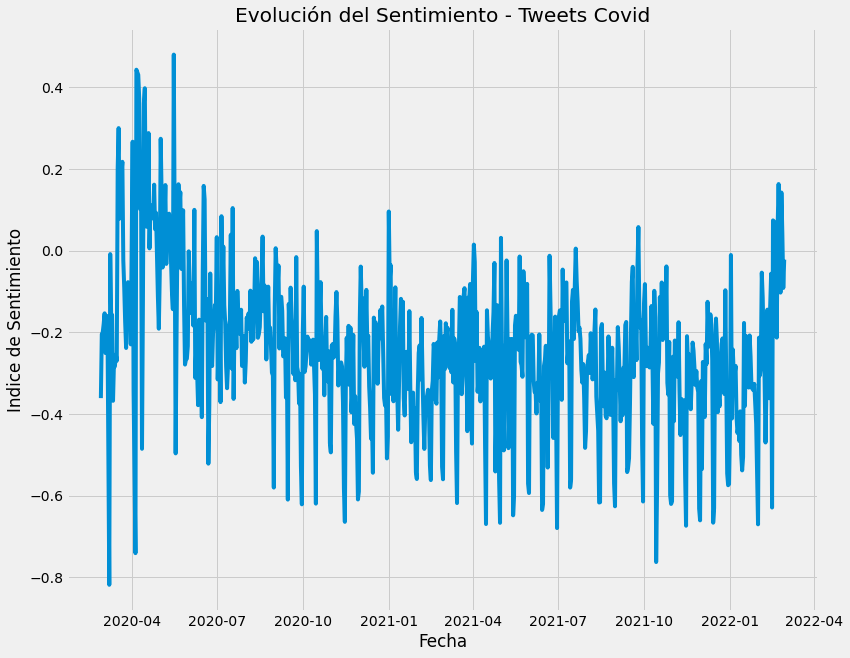

In [3]:
plt.figure(figsize=(12, 10))
plt.xlabel("Fecha")
plt.ylabel("Indice de Sentimiento")
plt.title("Evolución del Sentimiento - Tweets Covid")
plt.plot(df3["Polarity"])

<h3>Se crea un método para que se pueda visualizar la serie de tiempo en función de un rango específico de fechas</h3>

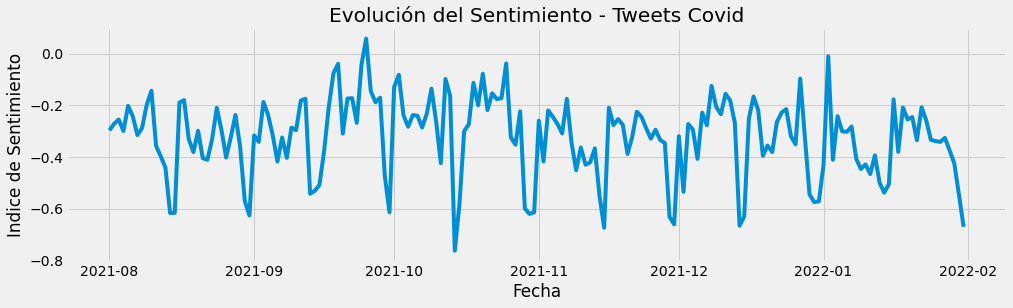

In [15]:
fecha_ini = '2021-08-01'
fecha_fin = '2022-01-31'

mask = (df['Fecha'] >= fecha_ini) & (df['Fecha'] <= fecha_fin)
df3 = df2.loc[mask]
df3 = df3.groupby(['Fecha']).mean()

plt.figure(figsize=(15, 4))
plt.xlabel("Fecha")
plt.ylabel("Indice de Sentimiento")
plt.title("Evolución del Sentimiento - Tweets Covid")
plt.plot(df3["Polarity"])